# <b>CS156 (Introduction to AI), Spring 2022</b>
# <u><b>Final term project</b></u>

### Roster Name: Your Name
### Preferred Name (if different): Chosen Name
### Student ID: xxxxxxx
### Email address: me@me.com
Any special notes or anything you would like to communicate to me about this project submission goes in here.

##  <u> Project description/introduction text (the background information) </u>

Add the description of this project. Describe the background of the problem your project is trying to solve. Describe the ML problem you are solving below. 

##  <u> Machine learning algorithm selected for this project </u>

Name and add short description of the algorithm used for this project. You can re-use this text in your final poster submission.

##  <u> Dataset source </u>

List the source from where the dataset for this project was obtained.

##  <u> References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [17]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [18]:
np.random.seed(42)

#### Code the solution

In [82]:
# Load Dataset

df = pd.read_csv(r'healthcare-dataset-stroke-data.csv')
df.dropna(axis=0, inplace=True)
Y = df['stroke']
X = df.drop (['stroke'], axis = 1)
#X = df['hypertension']

targets = ["0", "1"]

In [83]:
# Replace String Category to Numbers

X['gender'] = X['gender'].replace({'Male':0,'Female':1, 'Other':2})
X['ever_married'] = X['ever_married'].replace({'No':0,'Yes':1})
X['work_type'] = X['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2, 'children':3, 'Never_worked':4})
X['Residence_type'] = X['Residence_type'].replace({'Urban':0,'Rural':1})
X['smoking_status'] = X['smoking_status'].replace({'formerly smoked':0,'never smoked':1,'smokes':2, 'Unknown':3})
#X['bmi'] = X['bmi'].replace({'N/A':0})

In [84]:
# Data Rescale

scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X)

In [98]:
# Data Split

X_train, X_test, Y_train, Y_test = train_test_split(X_rescaled, Y, test_size=0.25, random_state=0, stratify=Y)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((3681, 11), (3681,), (1228, 11), (1228,))

In [99]:
# ML Model

model = LinearSVC()

In [100]:
# Cross Validation

res = cross_val_score(model, X_train, Y_train, cv=5, n_jobs=-1)

print('Individual Cross-Validation Accuracies : ')
print (res)
print('Mean Cross-Validation Accuracies : ')
print (res.mean())

Individual Cross-Validation Accuracies : 
[0.96 0.96 0.96 0.96 0.96]
Mean Cross-Validation Accuracies : 
0.9573487552356792


In [101]:
# Model Fitting

model.fit(X_train,Y_train)

print('Accuracy of linear SVC on training set: {:.2f}'.format(model.score(X_train, Y_train)))

print('Accuracy of linear SVC on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of linear SVC on training set: 0.96
Accuracy of linear SVC on test set: 0.96


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


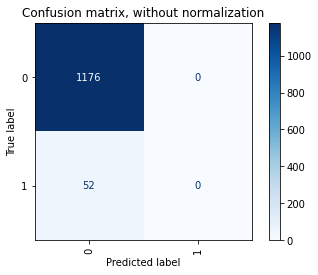

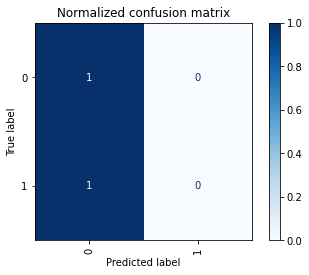

In [102]:
# Confusion Matrix

np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=targets,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, xticks_rotation='vertical')
    disp.ax_.set_title(title)

  

plt.show()